# Weather.Py - Tempo Climatico em Python 
----

#### Gerador aleatório de cidades e análise meteorológica por latitudes


In [19]:
# Dependências e configuração


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Importação da Chave API( API key)
# from api_keys import weather_api_key
weather_api_key = "05b11185be5856c9012fcfbc2f94e099"

# Cidade incorporada para determinar a cidade com base na latitude e longitude
# instale a partir da linha de comando antes de abrir o notebook jupyter como 'pip install citipy'
from citipy import citipy

# Arquivo de saída (CSV)
output_data_file = "output_data/cities.csv"

# Faixa de latitudes e longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Gerar lista de cidades

In [13]:
# Lista de retenção de lat_lngs e cidades
lat_lngs = []
cities = []

# Crie um conjunto de combinações aleatórias de lat e lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identifique a cidade mais próxima para cada combinação de lat e lng
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # Se a cidade for única, adicione-a à nossa lista de cidades
    if city not in cities:
        cities.append(city)

# Imprima a contagem de cidades para confirmar a contagem suficiente
len(cities)

612

### Realizar chamadas de API
* Execute uma verificação meteorológica em cada cidade usando uma série de chamadas de API sucessivas.
* Inclua um registro impresso de cada cidade à medida que ela for processada (com o número e o nome da cidade).


In [14]:
# crie url para consulta com unidades imperiais e cidade no final
# url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={unit}&q="

# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")

City processed: demyansk
City processed: grytviken
City processed: rapid city
City processed: waitangi
City processed: port-aux-francais
City processed: edinburgh of the seven seas
City processed: hermanus
City processed: vorgashor
City processed: leppavirta
City processed: ribeira grande
City processed: jinghong
City processed: new norfolk
City processed: lihue
City processed: evans
City processed: ushuaia
City processed: aykhal
City processed: puerto natales
City processed: cartagena
City processed: itaituba
City processed: bouar
City NOT found: taiohae
City processed: adamstown
City processed: panaba
City processed: artesia
City processed: ola
City NOT found: toga village
City processed: ushtobe
City processed: peace river
City processed: auki
City processed: port mathurin
City processed: zaragoza
City processed: sawa sawa
City processed: cabo san lucas
City processed: papatowai
City processed: magadan
City processed: howrah
City processed: republic
City processed: saipan
City proce

### Converter dados brutos em DataFrame
* Exporte os dados da cidade para um .csv.
* Exibir o DataFrame

In [20]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [21]:
# Caminho da área de trabalho do Windows
Weather_DF.to_csv(
    r"D:/David/Backup/2023/PosGraduacao/Modulo1/04ILP/Desafio/output_data/Cities.csv",
    index=False,
)
# Caminho da área de trabalho do Macbook (caso queira testar no seu Notebook profesor)
# Weather_DF.to_csv(r'D:/David/Backup/2023/PosGraduacao/Modulo1/04ILP/Desafio/output_data/Cities.csv', index = False)
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,demyansk,RU,30.92,71,100,10.31,57.6430,32.4660,1698360065
1,grytviken,GS,34.57,97,100,11.54,-54.2811,-36.5092,1698360066
2,rapid city,US,25.74,85,100,23.02,44.0805,-103.2310,1698360067
3,waitangi,NZ,56.82,90,98,13.00,-43.9535,-176.5597,1698360067
4,port-aux-francais,TF,35.83,80,99,18.86,-49.3500,70.2167,1698360068
...,...,...,...,...,...,...,...,...,...
578,minab,IR,77.47,61,78,2.15,27.1467,57.0801,1698360341
579,turpan,CN,57.74,38,33,0.96,42.9333,89.1667,1698360410
580,castelnaudary,FR,58.95,92,92,18.72,43.3183,1.9545,1698360410
581,revelstoke,CA,41.02,48,100,10.36,50.9832,-118.2023,1698360411


## Inspecione os dados e remova as cidades onde a umidade é > 100%.
----
Pule esta etapa se não houver cidades com umidade > 100%. 

In [22]:
badHumidityDF = Weather_DF[(Weather_DF['Humidity'] > 100)]
badHumidityDF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date


In [23]:
#  Obtenha os índices das cidades que apresentam umidade superior a 100%.
badHumidityDF.index

Index([], dtype='int64')

In [ ]:
# Faça um novo DataFrame igual aos dados da cidade para eliminar todos os valores discrepantes de umidade por índice.
# Passar "inplace=False" fará uma cópia do DataFrame city_data, que chamamos de "clean_city_data".

clean_city_data = Weather_DF.join(badHumidityDF, how="outer")

clean_city_data = Weather_DF.merge(badHumidityDF, on=index, inplace=False).query(
    "index!=index"
)

In [25]:
# Extraia campos relevantes do quadro de dados
City_Data = Weather_DF[
    [
        "City",
        "Country",
        "Latitude",
        "Temperature",
        "Humidity",
        "Cloudiness",
        "Windspeed",
        "Date",
    ]
]

# Exporte City_Data para um csv
# Caminho do Windows
City_Data.to_csv(
    r"D:/David/Backup/2023/PosGraduacao/Modulo1/04ILP/Desafio/output_data/City_Data.csv",
    index=False,
)
# Caminho do Macbook
# City_Data.to_csv(r'D:/David/Backup/2023/PosGraduacao/Modulo1/04ILP/Desafio/output_data/City_Data.csv', index = False)
City_Data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,demyansk,RU,57.6430,30.92,71,100,10.31,1698360065
1,grytviken,GS,-54.2811,34.57,97,100,11.54,1698360066
2,rapid city,US,44.0805,25.74,85,100,23.02,1698360067
3,waitangi,NZ,-43.9535,56.82,90,98,13.00,1698360067
4,port-aux-francais,TF,-49.3500,35.83,80,99,18.86,1698360068


## Plotando os dados
* Use rotulagem adequada dos gráficos usando títulos de gráficos (incluindo data de análise) e rótulos de eixos.
* Salve as figuras plotadas como .pngs.

## Gráfico de latitude vs. temperatura

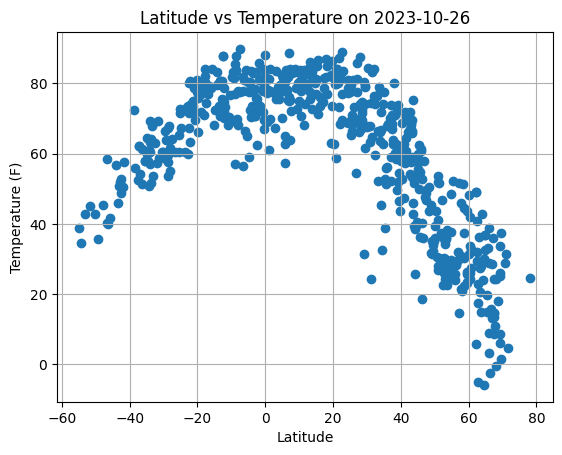

In [26]:
# formate a data máxima no conjunto de dados como "runDate" para títulos de gráficos
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime("%Y-%m-%d")

# definir dados para plota
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x, y)
# adicionar linhas de grade
plt.grid()
# adicione títulos e rótulos de eixo
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# exportar como png
plt.savefig(f"../output_data/Latitude vs Temperature on {runDate}.png")
# mostra plot!
plt.show()

### Análise do gráfico de dispersão de latitude x temperatura

O gráfico de dispersão mapeia a temperatura das cidades em relação à sua latitude. Cidades selecionadas aleatoriamente.
O arco do gráfico de dispersão mostra a temperatura aumentando perto do equador (Latitude 0) e diminuindo mais longe. Dada a data de execução de junho de 2020, o gráfico também distorce temperaturas mais elevadas à direita do equador devido ao verão no hemisfério norte.

## Gráfico de Latitude vs. Umidade

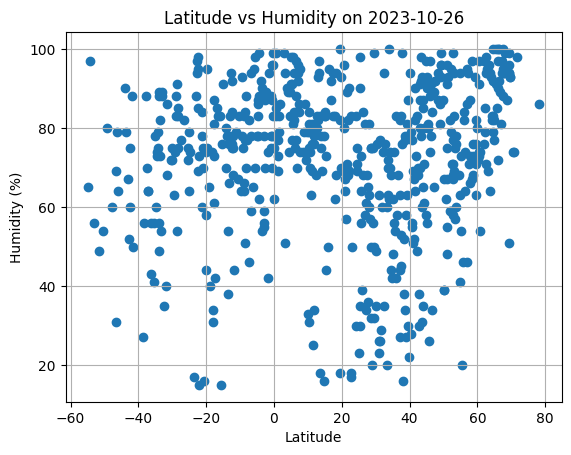

In [27]:
# definir dados para plotar; retenha a latitude do gráfico anterior como "x"
h = City_Data["Humidity"]
plt.scatter(x, h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f"../output_data/Latitude vs Humidity on {runDate}.png")
plt.show()

### Informações sobre o gráfico de dispersão de latitude x umidade

O gráfico de dispersão mapeia a umidade das cidades em relação à sua latitude. Cidades selecionadas aleatoriamente.

O resultado não revela nenhuma correlação particular entre umidade e latitude.

## Gráfico de Latitude vs. Nebulosidade

<function matplotlib.pyplot.show(close=None, block=None)>

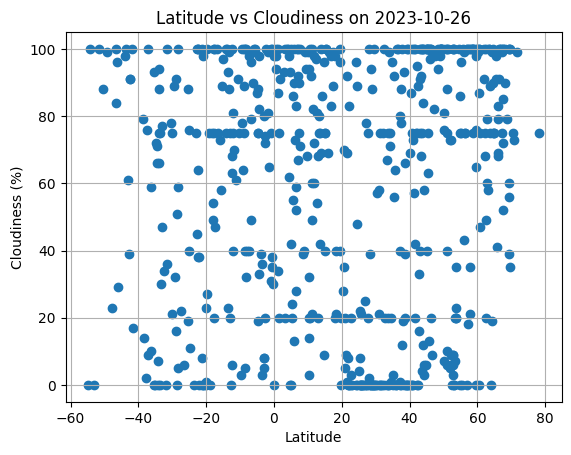

In [28]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show

### Informações sobre o Gráfico de Dispersão de Latitude x Nebulosidade

O gráfico de dispersão mapeia a porcentagem de nebulosidade das cidades em relação à sua latitude. Cidades selecionadas aleatoriamente.

O resultado não revela nenhuma correlação particular entre nebulosidade e latitude. No entanto, pode haver uma ligeira tendência para percentagens arredondadas de nebulosidade, dados os agrupamentos próximos de cada linha de 10s (ex: 40% de nebulosidade).

## Gráfico Latitude vs. Velocidade do Vento

0      10.31
1      11.54
2      23.02
3      13.00
4      18.86
       ...  
578     2.15
579     0.96
580    18.72
581    10.36
582     4.61
Name: Windspeed, Length: 583, dtype: float64


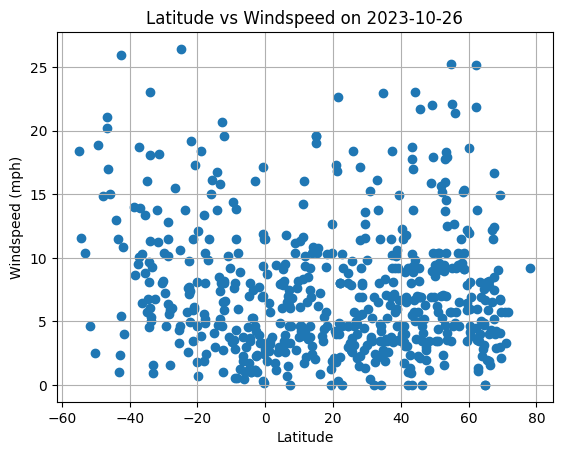

In [33]:
ws = City_Data["Windspeed"]
print (ws)
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

### Informações sobre o gráfico de dispersão de latitude e velocidade do vento

O gráfico de dispersão mapeia a velocidade do vento das cidades em relação à sua latitude. Cidades selecionadas aleatoriamente.

O resultado não revela nenhuma correlação particular entre a velocidade do vento e a latitude.

## Regressão linear

The r-square is 0.10197807460094557
y = 0.06x + 71.1


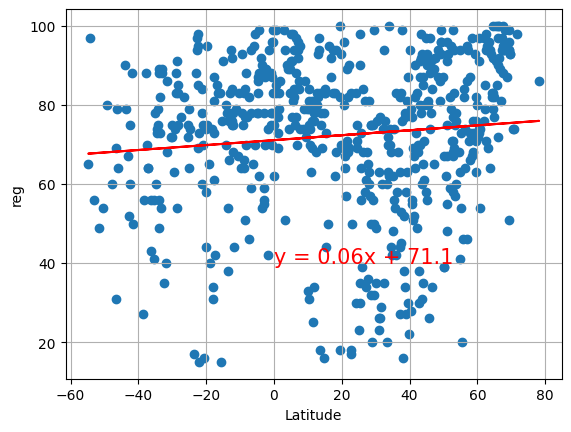

In [48]:
# Função para criar gráficos de regressão linear

# função a ser chamada é "linearRegression"
# variáveis ​​são
# x_values: primeiro conjunto de data
# y_values: segundo conjunto de data
# regEQplotX: onde a equação de regressão linear aparece na linha plot x do gráfico
# regEQplotY: onde a equação de regressão linear aparece na linha y do gráfico
# y_label: o rótulo do eixo y do gráfico (o rótulo x é sempre Latitude)


def linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    print(f"The r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq, (regEQplotX, regEQplotY), fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()


x = Weather_DF["Latitude"]
y = City_Data["Humidity"]

linearRegression(x, y, 0, 40, "reg")

In [39]:
# Criar DataFrames do Hemisfério Norte e Sul
# pull loc acima e abaixo do equador; observe que todas as cidades diretamente no equador (ou seja, latitude = 0) são excluídas

Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]

Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8597020180751461
y = -1.0x + 92.86


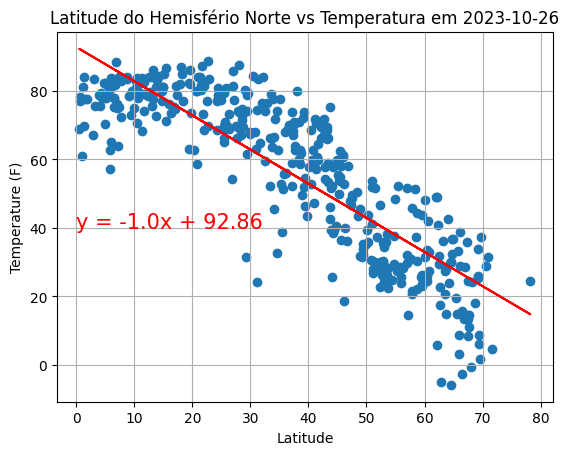

In [47]:
# defina os conjuntos de dados para comparar
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
# tweak onde a equação aparece no gráfico
regEQplotX = 0
regEQplotY = 40
# titulo o eixo y
y_label = "Temperature (F)"
# Coloca o titulo
plt.title(f"Latitude do Hemisfério Norte vs Temperatura em {runDate}")
# execute a função com todas as 5 variáveis
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
# save como png na pasta output_data folder
plt.savefig(
    f"../output_data/Latitude do Hemisfério Norte vs Temperatura em {runDate}.png"
)
plt.show()

#### Hemisfério Sul - Temperatura Máxima vs. Regressão Linear de Latitude

The r-square is 0.8015877789160349
y = 0.67x + 82.71


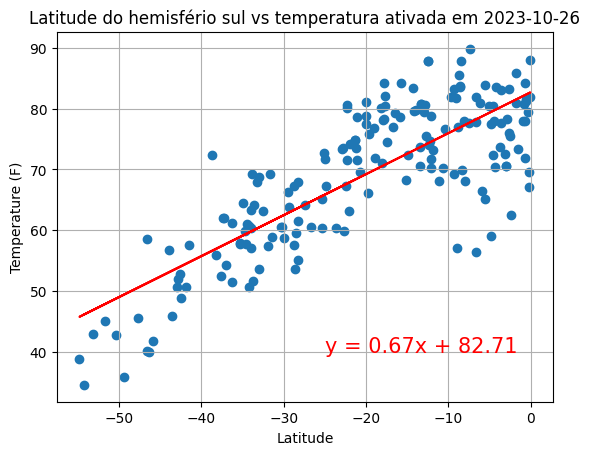

In [49]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f"Latitude do hemisfério sul vs temperatura relativa em {runDate}")
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
plt.savefig(
    f"../output_data/Latitude do hemisfério sul vs temperatura relativa em  {runDate}.png"
)
plt.show()

### Latitude Norte/Sul vs TEMPERATURA Análise de regressão linear

O gráfico de dispersão mapeia a temperatura das cidades do Norte e do Sul em relação à sua latitude. Cidades selecionadas aleatoriamente.

O resultado revela uma forte correlação entre a distância da temperatura do equador. Quanto mais próximo do equador, maior será a temperatura.

#### Hemisfério Norte - Umidade (%) vs. Regressão Linear de Latitude

The r-square is -0.06517863081603088
y = -0.07x + 69.27


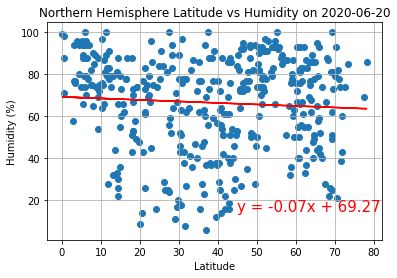

In [17]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Humidity"]
regEQplotX = 45
regEQplotY = 15
y_label = "Umidade (%)"
plt.title(f"Latitude do Hemisfério Norte vs Umidade relativa em {runDate}")
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
plt.savefig(
    f"../output_data/Latitude do Hemisfério Norte vs Umidade relativa em {runDate}.png"
)
plt.show()

#### Hemisfério Sul - Umidade (%) vs. Regressão Linear de Latitude

The r-square is -0.13440802925869613
y = -0.18x + 71.8


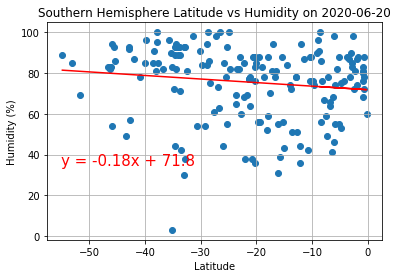

In [18]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f"Latitude do Hemisfério Sul vs Umidade relativa em {runDate}")
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
plt.savefig(
    f"../output_data/Latitude do Hemisfério Sul vs Umidade relativa em {runDate}.png"
)
plt.show()

### Latitude Norte/Sul vs HUMIDADE Análise de regressão linear

O gráfico de dispersão mapeia a umidade das cidades do Norte e do Sul em relação à sua latitude. Cidades selecionadas aleatoriamente.

O resultado não revela nenhuma correlação entre latitude e umidade.

#### Hemisfério Norte - Nebulosidade (%) vs. Regressão Linear de Latitude

The r-square is 0.12845653894942013
y = 0.25x + 48.08


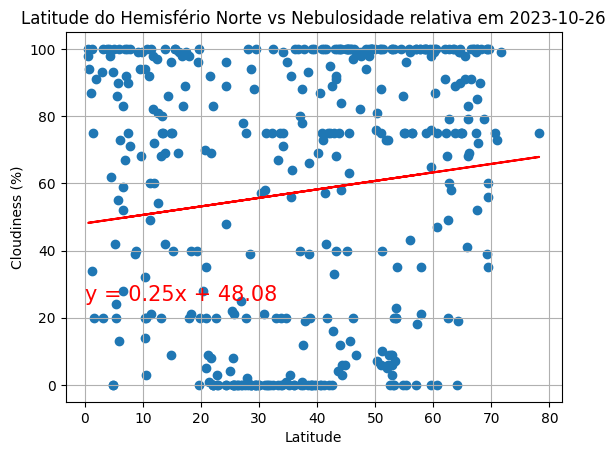

In [50]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f"Latitude do Hemisfério Norte vs Nebulosidade relativa em {runDate}")
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
plt.savefig(
    f"../output_data/Latitude do Hemisfério Norte vs Nebulosidade relativa em {runDate}.png"
)
plt.show()

#### Hemisfério Sul - Nebulosidade (%) vs. Regressão Linear de Latitude

The r-square is 0.09501476152968831
y = 0.24x + 63.48


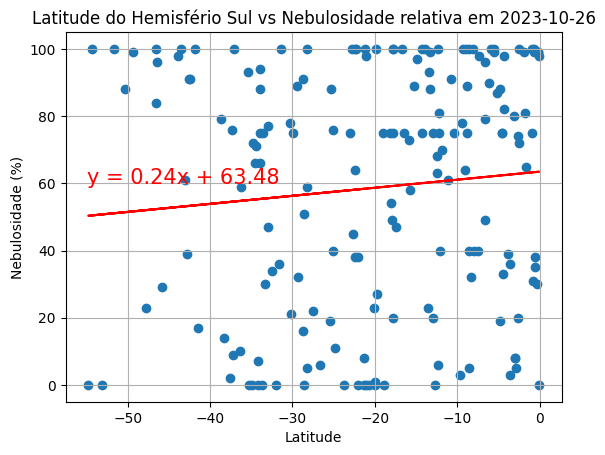

In [51]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Nebulosidade (%)"
plt.title(f"Latitude do Hemisfério Sul vs Nebulosidade relativa em {runDate}")
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
plt.savefig(
    f"../output_data/Latitude do Hemisfério Sul vs Nebulosidade relativa em {runDate}.png"
)
plt.show()

### Latitude Norte/Sul vs CLOUDINESS Análise de regressão linear

O gráfico de dispersão mapeia a nebulosidade das cidades do Norte e do Sul em relação à sua latitude. Cidades selecionadas aleatoriamente.

O resultado não revela nenhuma correlação entre latitude e nebulosidade.

#### Hemisfério Norte - Velocidade do Vento (mph) vs. Regressão Linear de Latitude

The r-square is 0.12294479416136124
y = 0.03x + 6.0


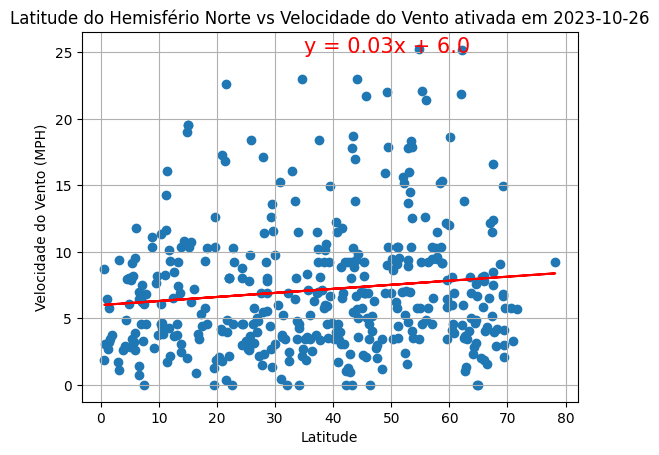

In [52]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Velocidade do Vento (MPH)"
plt.title(f"Latitude do Hemisfério Norte vs Velocidade do Vento ativada em {runDate}")
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
plt.savefig(
    f"../output_data/Latitude do Hemisfério Norte vs Velocidade do Vento ativada em {runDate}.png"
)
plt.show()

#### Hemisfério Sul - Velocidade do Vento (mph) vs. Regressão Linear de Latitude

The r-square is -0.3739416469004197
y = -0.15x + 5.1


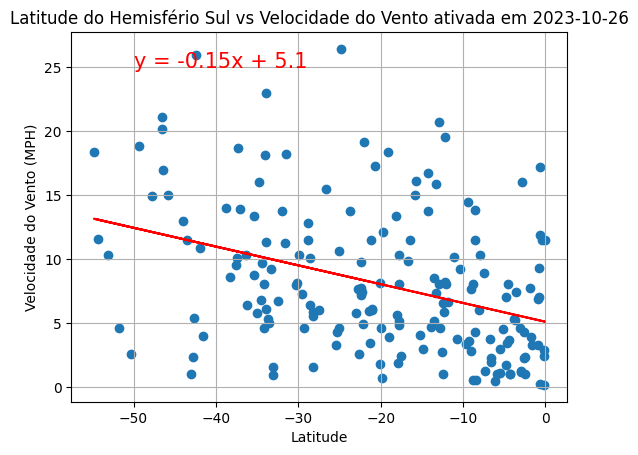

In [53]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Velocidade do Vento (MPH)"
plt.title(f"Latitude do Hemisfério Sul vs Velocidade do Vento ativada em {runDate}")
linearRegression(x_values, y_values, regEQplotX, regEQplotY, y_label)
plt.savefig(
    f"../output_data/Latitude do Hemisfério Sul vs Velocidade do Vento ativada em {runDate}.png"
)
plt.show()

### Latitude Norte/Sul vs. Insights de regressão linear de VELOCIDADE DO VENTO

O gráfico de dispersão mapeia a velocidade do vento das cidades do Norte e do Sul em relação à sua latitude. Cidades selecionadas aleatoriamente.

O resultado não revela nenhuma correlação entre a latitude e a velocidade do vento.